In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
table = pd.read_csv("ds_salaries.csv")

In [37]:
table.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [38]:
table["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Mid", "Senior", "Expert"], inplace=True)
table["remote_ratio"].replace([0, 50, 100], ["On-site", "Hybrid", "Remote"], inplace=True)
table["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"], inplace=True)
table["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"], inplace=True)

In [39]:
table.drop('Unnamed: 0', axis=1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,EUR,79833,DE,On-site,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,US,Remote,US,Medium
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,US,Remote,US,Medium
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,US,On-site,US,Medium
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,US,Remote,US,Medium


In [40]:
table.shape

(607, 12)

In [41]:
table['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [42]:
table['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [43]:
salary_title = table.groupby('job_title').sum()
salary_title = salary_title[['salary_in_usd']].sort_values(by='salary_in_usd', ascending=False)
display(salary_title)

,salary_in_usd
job_title,
Data Scientist,15470860
Data Engineer,14879700
Data Analyst,9010627
Machine Learning Engineer,4300086
Data Architect,1956613
Data Science Manager,1899942
Research Scientist,1744312
Principal Data Scientist,1506697
Director of Data Science,1365518


In [45]:
def univariate_multi_plot(df=table, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, ha="center", va="center")
    plt.show()
    
    
def univariate_single_plot(df=table, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(25, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=20)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=16, padding=1,color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18)
    plt.show()

def multivariate_count_plot(df=table, x=None, hue=None, xlabel=None, hue_label=None, rotation=None, 
                            legend=False, bar_label=False):
    fig ,ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, hue=hue)
    plt.ylabel(ylabel="", size=12)
    plt.xlabel(xlabel=xlabel, size=12)
    plt.title(label=f'{hue_label} vs. {xlabel}', size=16)
    plt.xticks(rotation=rotation)
    if bar_label:
        for i in range(df[hue].nunique()):
            ax.bar_label(ax.containers[i], label_type='edge', size=10, padding=1, 
                    color="#7f7f7f")
    if legend:
        plt.legend()
    sns.despine(bottom=True, left=True)
    plt.show()

In [46]:
def multivariate_plot(df=table, x=None, hue=None, xlabel=None, rotation=None, bar_label=True, 
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    df = df.groupby(x).mean()["salary"].sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y="salary", hue=hue, ci=None)
    plt.ylabel(ylabel="Salary (in USD)", size=12)
    plt.xlabel(xlabel=xlabel, size=12)
    plt.title(label=f'Salaries by {xlabel}', size=16)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=17, padding=3, 
                    color="#000000", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, 
                    color="#000000")
    sns.despine(bottom=True, left=True)
    plt.show()

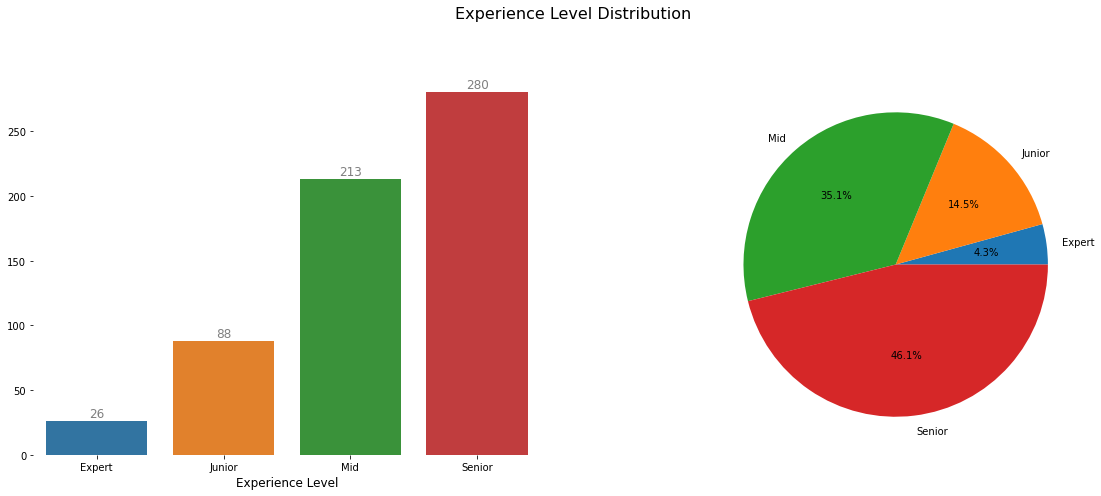

In [47]:
univariate_multi_plot(x="experience_level", xlabel="Experience Level")

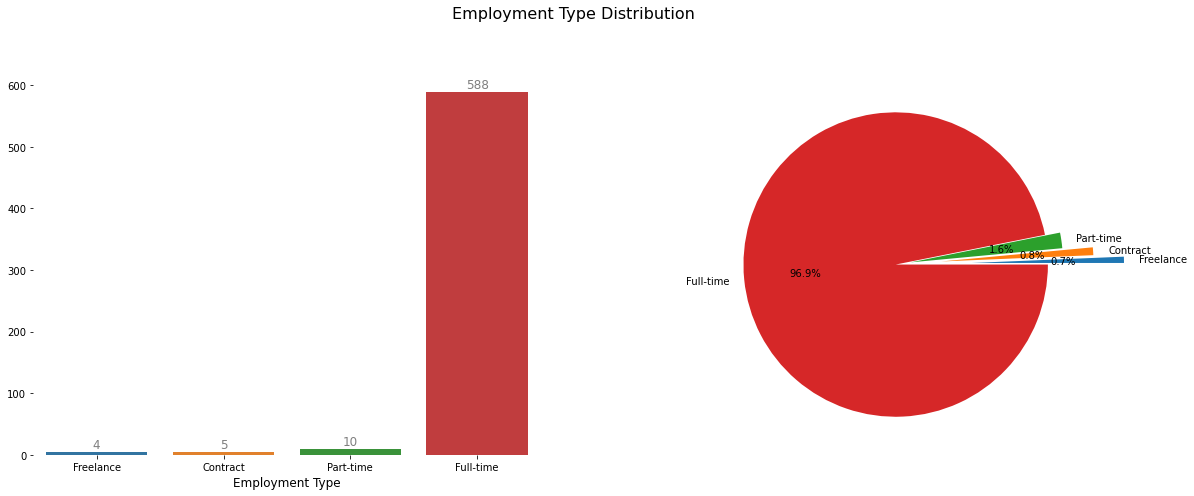

In [48]:
univariate_multi_plot(x="employment_type", xlabel="Employment Type", explode=(0.5, 0.3, 0.1, 0))

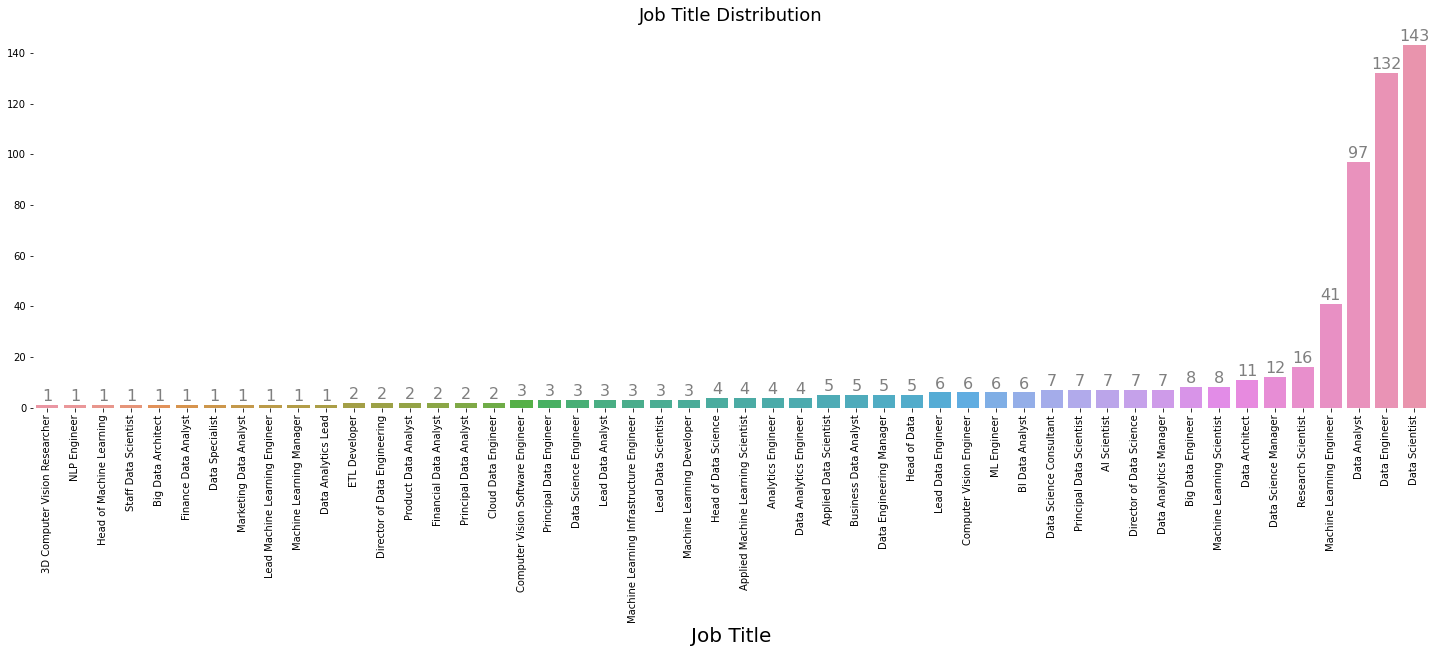

In [49]:
univariate_single_plot(x="job_title", xlabel="Job Title", rotation=90, bar_label=True)

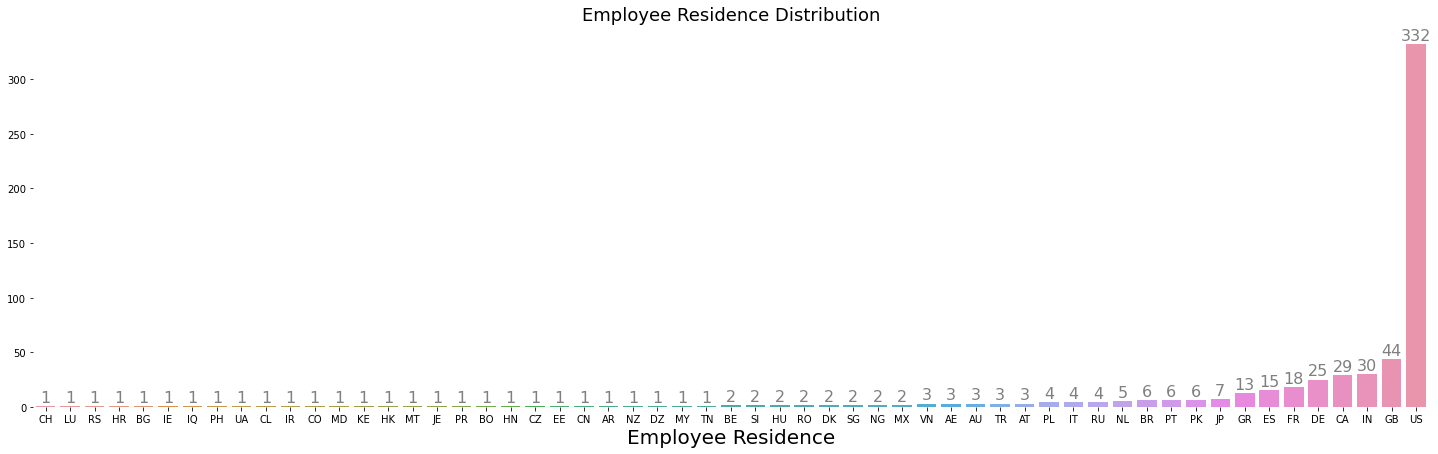

In [50]:
univariate_single_plot(x="employee_residence", xlabel="Employee Residence", bar_label=True)

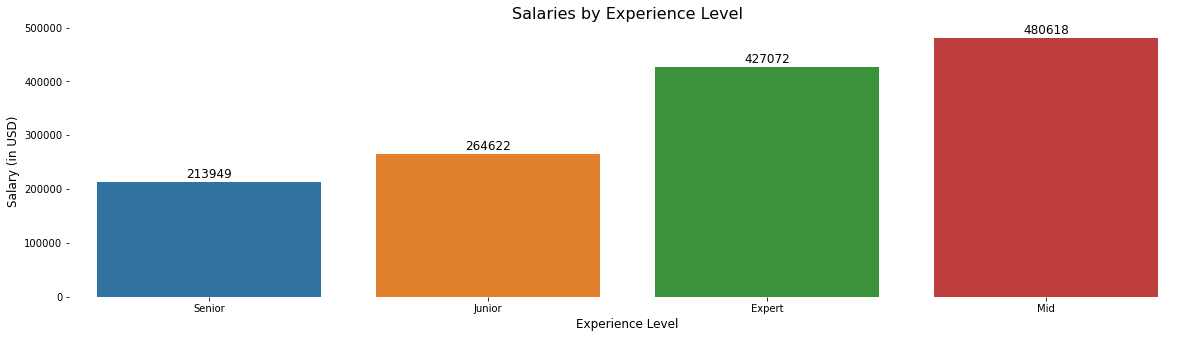

In [51]:
multivariate_plot(x="experience_level", xlabel="Experience Level")

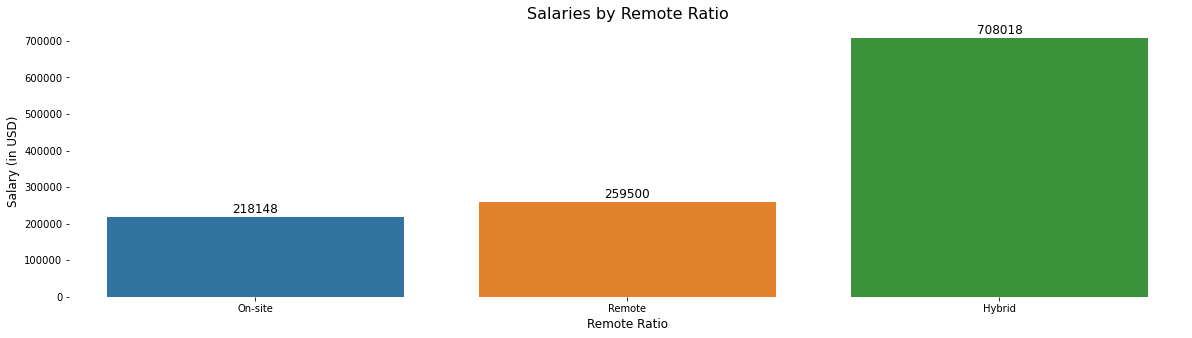

In [52]:
multivariate_plot(x="remote_ratio", xlabel="Remote Ratio")

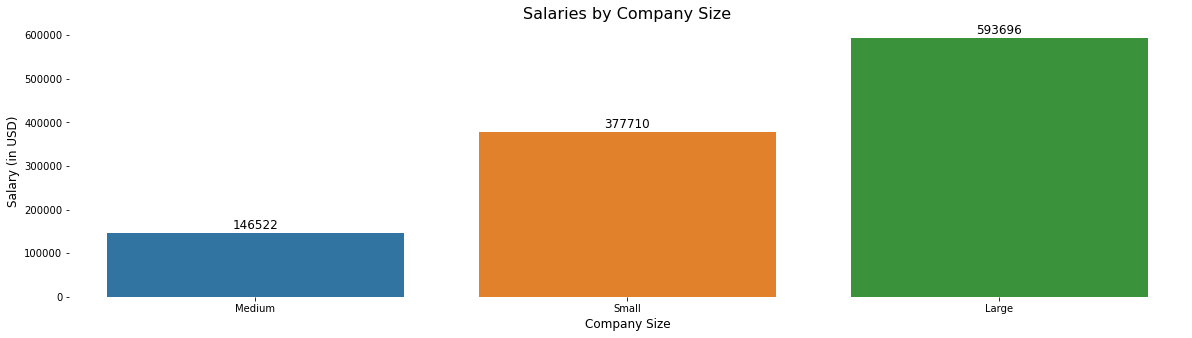

In [53]:
multivariate_plot(x="company_size", xlabel="Company Size")

In [54]:
full_remote_by_country = table[table["remote_ratio"] == "Remote"]["company_location"].value_counts(ascending=False)
most_common_countries = list(full_remote_by_country.head(5).index)
remote_with_most_common_country = table[table["company_location"].isin(most_common_countries)]

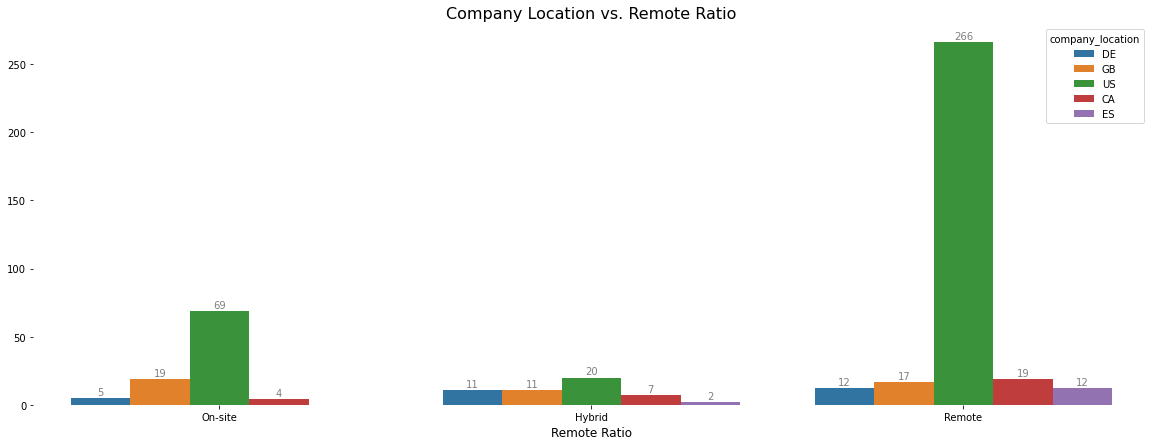

In [55]:
multivariate_count_plot(df=remote_with_most_common_country, x="remote_ratio", hue="company_location",
                       xlabel="Remote Ratio", hue_label="Company Location", bar_label=True)